In [2]:
import pandas as pd
from nixtla import NixtlaClient

In [44]:
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-PQ4qX4wUyEUPn0Vp5SBLNWq2WqOU0GdnfgmZwrRfbcCHmRdfu0JMBmNyOl4m2IJUNjJuZYeJn0LBxHtm')
df = pd.read_csv('modified.csv')
df.head()
time_col = 'Date'
target_col = 'Close'

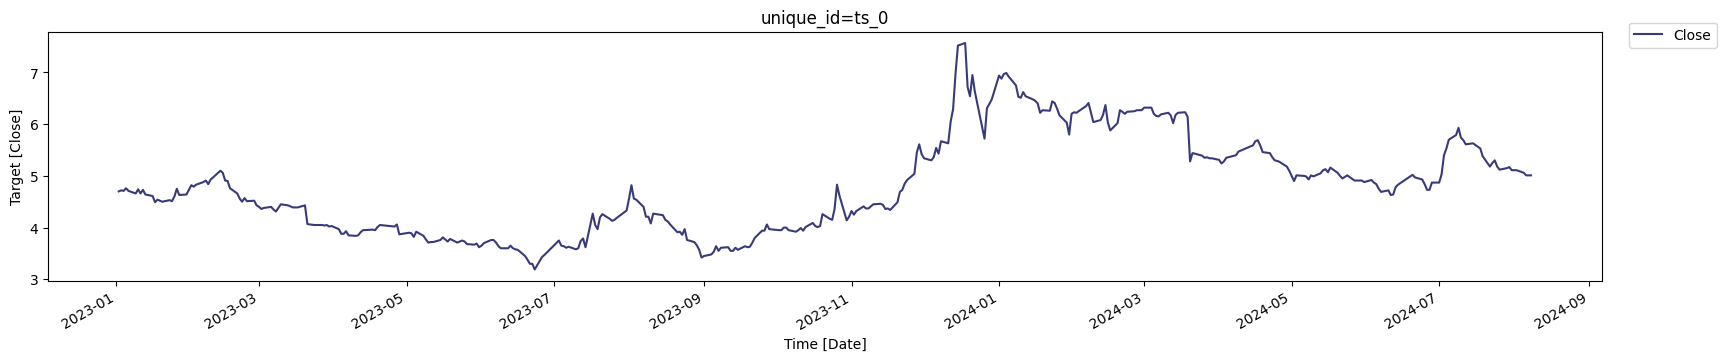

In [45]:
nixtla_client.plot(df, time_col=time_col, target_col=target_col)

In [46]:
X_df = pd.read_csv("modified.csv")
X_df = X_df.rename(columns={'Date': 'ds'})

exog_open = X_df[['ds', 'Open']]
exog_high = X_df[['ds', 'High']]
exog_low = X_df[['ds', 'Low']]
exog_volume = X_df[['ds', 'Volume']]
exog_SMA3 = X_df[['ds', 'SMA_3']]
timegpt_fcst_ex_open = nixtla_client.forecast(df=exog_open,freq='B' ,h=30, target_col='Open')
timegpt_fcst_ex_high = nixtla_client.forecast(df=exog_high,freq = 'B', h=30, target_col='High')
timegpt_fcst_ex_low = nixtla_client.forecast(df=exog_low,freq = 'B', h=30, target_col='Low')
timegpt_fcst_ex_volume = nixtla_client.forecast(df=exog_volume,freq = 'B',  h=30, target_col='Volume')
timegpt_fcst_ex_SMA3 = nixtla_client.forecast(df=exog_SMA3,freq = 'B',  h=30, target_col='SMA_3')


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Foreca

In [47]:
timegpt_fcst_ex_open = timegpt_fcst_ex_open.rename(columns = {'TimeGPT':'Open'})
timegpt_fcst_ex_high = timegpt_fcst_ex_high.rename(columns = {'TimeGPT':'High'})
timegpt_fcst_ex_low = timegpt_fcst_ex_low.rename(columns = {'TimeGPT':'Low'})
timegpt_fcst_ex_volume = timegpt_fcst_ex_volume.rename(columns = {'TimeGPT':'Volume'})
timegpt_fcst_ex_SMA3 = timegpt_fcst_ex_SMA3.rename(columns = {'TimeGPT':'SMA_3'})
timegpt_fcst_ex_high.head()

,ds,High
0,2024-08-09,5.083665
1,2024-08-12,5.098750
2,2024-08-13,5.106305
3,2024-08-14,5.097706
4,2024-08-15,5.072949


In [48]:
final_exogenous_df = timegpt_fcst_ex_open.merge(timegpt_fcst_ex_high, on='ds', how='outer')
final_exogenous_df = final_exogenous_df.merge(timegpt_fcst_ex_low, on='ds', how='outer')
final_exogenous_df = final_exogenous_df.merge(timegpt_fcst_ex_volume, on='ds', how='outer')
final_exogenous_df = final_exogenous_df.merge(timegpt_fcst_ex_SMA3, on='ds', how='outer')
final_exogenous_df.head()

,ds,Open,High,Low,Volume,SMA_3
0,2024-08-09,5.053943,5.083665,4.952873,2638695.75,5.016931
1,2024-08-12,5.054846,5.098750,4.965574,3222843.50,5.021383
2,2024-08-13,5.064713,5.106305,4.980479,3785511.75,5.018155
3,2024-08-14,5.074205,5.097706,4.974835,3959521.25,5.011077
4,2024-08-15,5.059459,5.072949,4.962415,3907430.75,4.992469


In [53]:
timegpt_fcst_df = nixtla_client.forecast(df=df, X_df=final_exogenous_df,  h=30,  freq='B', time_col=time_col, target_col=target_col)
timegpt_fcst_df = timegpt_fcst_df.rename(columns={'TimeGPT':'Predicted_Close'})
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using the following exogenous variables: Open, High, Low, Volume, SMA_3
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,Date,Predicted_Close
0,2024-08-09,4.970592
1,2024-08-12,5.024980
2,2024-08-13,5.053480
3,2024-08-14,5.010989
4,2024-08-15,4.981436


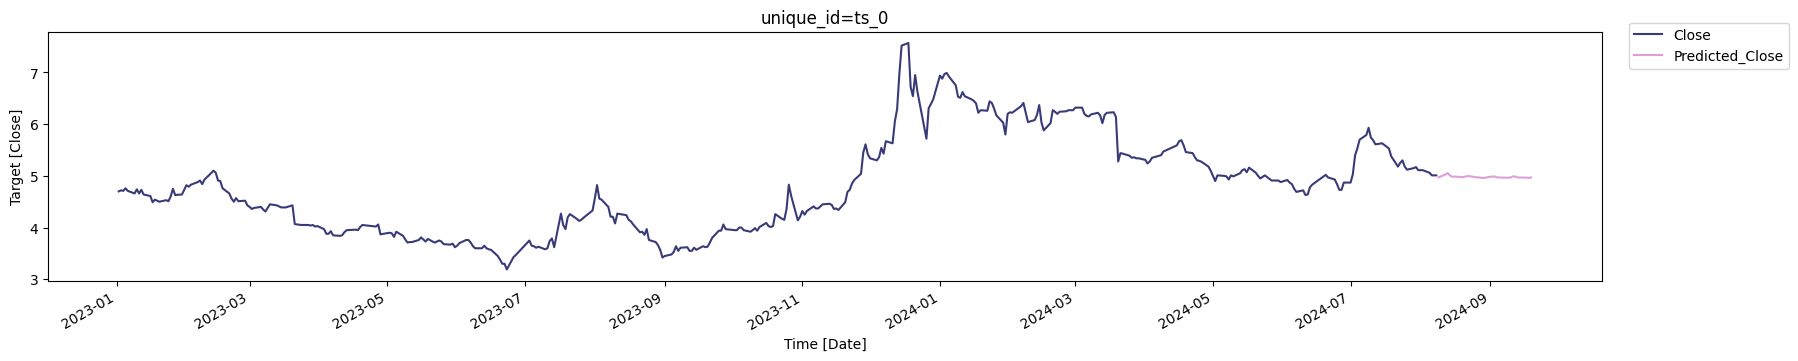

In [54]:
nixtla_client.plot(df, timegpt_fcst_df, time_col=time_col, target_col=target_col)